C:\Users\admin\AppData\Local\Temp\ipykernel_18252\1570901904.py:26: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


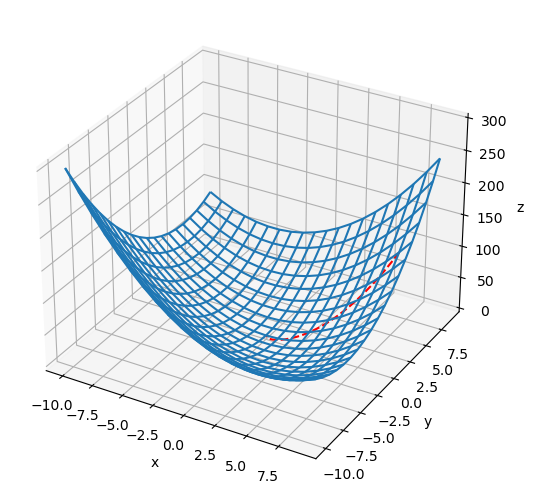

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# 目标函数
def f(x,y):
    return x**2 + y**2 + x*y

# 对x求偏导
def partial_x(x,y):
    return 2*x+y
    
# 对y求偏导
def partial_y(x,y):
    return 2*y+x

X = np.arange(-10, 10, 1)
Y = np.arange(-10, 10, 1)

X, Y = np.meshgrid(X, Y)
Z = f(X,Y)

# 绘制曲面
fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis)
#ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# 随机初始点
x = 8
y = 5
z = f(x,y)
next_x = x
next_y = y

xlist=[x]
ylist=[y]
zlist=[z]

# 设定一个学习率
step = 0.01
while True:
    next_x = x-step * partial_x(x,y)
    next_y = y-step * partial_y(x,y)    
    next_z = f(next_x, next_y)
    #print(next_x,next_y,next_z)
    
    # 小于阈值时，停止下降
    if z - next_z < 1e-9:
        break
        
    x = next_x
    y = next_y
    z = f(x,y)
    xlist.append(x)
    ylist.append(y)
    zlist.append(z)

ax.plot(xlist,ylist,zlist,'r--')
plt.show()